In [192]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal


In [193]:
#downloading data
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv"

--2024-01-05 16:53:56--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76466 (75K) [text/plain]
Saving to: ‘ionosphere.csv.10’

ionosphere.csv.10   100%[===================>]  74.67K  --.-KB/s    in 0.002s  

2024-01-05 16:53:56 (44.5 MB/s) - ‘ionosphere.csv.10’ saved [76466/76466]



In [194]:
#loading data
data = pd.read_csv('ionosphere.csv')

In [195]:
data.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [196]:
data.describe()


,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
count,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.891429,0.0,0.640330,0.044667,0.600350,0.116154,0.549284,0.120779,0.510453,0.181756,...,0.395643,-0.069928,0.542015,-0.068417,0.378919,-0.027013,0.352313,-0.002248,0.349829,0.015816
std,0.311546,0.0,0.498059,0.442032,0.520431,0.461443,0.493124,0.520816,0.507117,0.484482,...,0.579206,0.508675,0.516896,0.550411,0.576642,0.508425,0.572289,0.513491,0.523339,0.468338
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.471517,-0.065388,0.412555,-0.024868,0.209105,-0.053483,0.086785,-0.049003,...,0.000000,-0.323745,0.283612,-0.428992,0.000000,-0.234935,0.000000,-0.239347,0.000000,-0.161013
50%,1.000000,0.0,0.870795,0.016700,0.808620,0.021170,0.728000,0.015085,0.682430,0.017550,...,0.549175,-0.014915,0.708530,-0.017685,0.499215,0.000000,0.446875,0.000000,0.413115,0.000000
75%,1.000000,0.0,1.000000,0.194727,1.000000,0.335317,0.970445,0.451572,0.950555,0.536192,...,0.907165,0.157922,0.999972,0.154862,0.884572,0.154218,0.859490,0.200935,0.816778,0.172105
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
#choosing feature and target variables
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [198]:
#ensuring all data are floats
X = X.astype('float32')

In [199]:
#str to int
from sklearn.preprocessing import LabelEncoder

y= LabelEncoder().fit_transform(y)

In [200]:
#splitting data test for training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 0)

In [201]:
X_train.shape

(234, 34)

In [202]:
y_train.shape

(234,)

In [203]:
initializer = tf.keras.initializers.HeNormal()

In [204]:
#model
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(14, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dense(12, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

In [205]:
model = get_model()

In [206]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 14)                490       
                                                                 
 dense_30 (Dense)            (None, 12)                180       
                                                                 
 dense_31 (Dense)            (None, 1)                 13        
                                                                 
Total params: 683 (2.67 KB)
Trainable params: 683 (2.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [207]:
#complile model
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [208]:
#fitting model
history = model.fit(X_train, y_train, epochs=150,batch_size=32,verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
8/8 [==============================] - 1s 29ms/step - loss: 0.8706 - accuracy: 0.3632 - val_loss: 0.8103 - val_accuracy: 0.3534
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7755 - accuracy: 0.3590 - val_loss: 0.7286 - val_accuracy: 0.3707
Epoch 3/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7025 - accuracy: 0.3974 - val_loss: 0.6683 - val_accuracy: 0.4483
Epoch 4/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6489 - accuracy: 0.5043 - val_loss: 0.6227 - val_accuracy: 0.6724
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6081 - accuracy: 0.7436 - val_loss: 0.5892 - val_accuracy: 0.8017
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 0.5790 - accuracy: 0.8077 - val_loss: 0.5676 - val_accuracy: 0.8276
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5582 - accuracy: 0.8333 - val_loss: 0.5531 - val_accuracy: 0.8534
Epoch 8/150
8/8 [=======

In [209]:
#evaluation
model.evaluate(X_test, y_test,verbose=0)

[0.18815912306308746, 0.931034505367279]

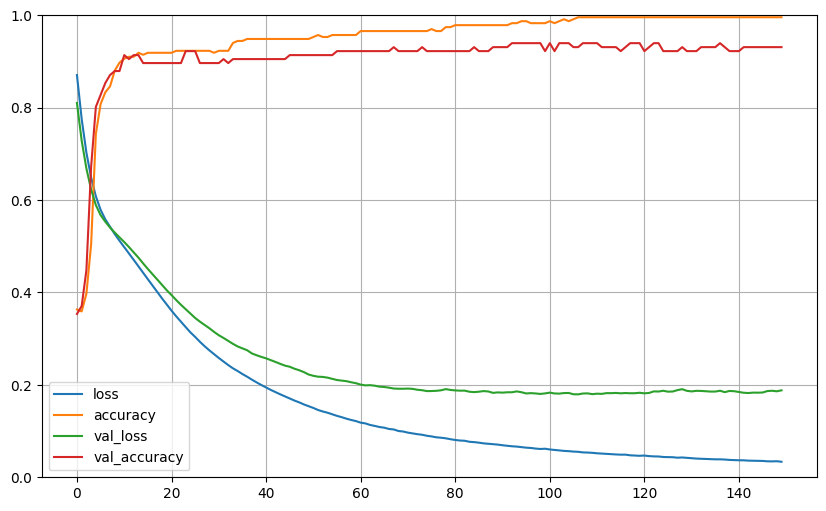

In [210]:
#loss and accuracy vs epochs graph
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()